# Optimization Techniques on MNIST Dataset
This notebook explores various optimization techniques for training neural networks on the MNIST dataset. The focus will be on different optimization strategies including Adaptive Learning Rates, SGD, Mini-Batch Gradient Descent, and Learning Rate Adjustments. Each section will provide a practical task related to these techniques.

-- name: Yousef Miryousefi
-- student ID: 401110642

In [38]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time


# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [39]:
print("Train Dataset:")
print(f"y_train: {np.shape(y_train)}")
print(f"x_train: {np.shape(x_train)}")
print("-" * 30)

print("Test Dataset:")
print(f"y_test: {np.shape(y_test)}")
print(f"x_test: {np.shape(x_test)}")
print("-" * 30)

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(f"x_train after reshape: {np.shape(x_train)}")
print(f"x_test after reshape: {np.shape(x_test)}")

Train Dataset:
y_train: (60000, 10)
x_train: (60000, 28, 28)
------------------------------
Test Dataset:
y_test: (10000, 10)
x_test: (10000, 28, 28)
------------------------------
x_train after reshape: (60000, 784)
x_test after reshape: (10000, 784)



3## Adaptive Learning Rates

## Implementing a Simple Neural Network from Scratch

### Building the Network
Define the architecture of a simple feedforward neural network with one hidden layer. You will need to manually initialize the weights and biases.

**TODO:** Initialize Parameters
Objective: Create a function to initialize weights and biases for all layers of the network.
Instructions:
- Initialize weights with small random values and biases with zeros.
- Use numpy for creating arrays and operations.

Hint: Use np.random.randn for weights and np.zeros for biases. Scale weights by 0.1.

In [40]:
def initialize_parameters(input_size, hidden_size, output_size):
    """
    Initialize weights and biases for a simple feedforward neural network.

    Parameters:
    - input_size: Number of input features.
    - hidden_size: Number of neurons in the hidden layer.
    - output_size: Number of output classes.

    Returns:
    - parameters: A dictionary containing weights and biases.
    """
    parameters = {
        "W1": np.random.randn(hidden_size, input_size) * 0.1,
        "W2": np.random.randn(output_size, hidden_size) * 0.1,
        "b1": np.zeros((hidden_size, 1)),
        "b2": np.zeros((output_size, 1))
    }
    return parameters


TODO: Define Activation Functions
Objective: Implement commonly used activation functions.
Instructions:
 - Define the ReLU and Sigmoid activation functions.
 - Ensure each function works with numpy arrays and supports both forward and derivative (gradient) computations.


In [41]:
def relu(x):
    """
    ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying ReLU.
    """
    return np.maximum(x, 0)

def relu_derivative(x):
    """
    Derivative of ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of ReLU.
    """
    return np.where(x >= 0, 1, 0)

def sigmoid(x):
    """
    Sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying sigmoid.
    """
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    """
    Derivative of sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of sigmoid.
    """
    s = 1 / (1 + np.exp(-x))
    return s * (1 - s)


def softmax(x):
    """
    Softmax activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying softmax.
    """
    stable_x = x - np.max(x, axis=0, keepdims=True)
    exp_x = np.exp(stable_x)
    return exp_x / np.sum(exp_x, axis=0, keepdims=True)

TODO: Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.

In [42]:
def forward_propagation(X, parameters):
    """
    Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.
    """
    
   # Hidden layer
    z1 = np.dot(parameters["W1"], X) + parameters["b1"]
    a1 = relu(z1) 

    # Output layer
    z2 = np.dot(parameters["W2"], a1) + parameters["b2"]
    a2 = softmax(z2) 

    cache = {
        "Z1": z1,
        "A1": a1,
        "Z2": z2,
        "A2": a2
    }

    return a2, cache

TODO: Implement the loss function. Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.

In [43]:
def compute_loss(y_true, y_pred):
    """
    Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.
    """
    y_pred = np.clip(y_pred, 1e-12, 1. - 1e-12)
    loss = -np.sum(y_true * np.log(y_pred), axis=0)
    l = np.mean(loss)
    return l

TODO: Implement backpropagation for the network and Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.

In [44]:
def backward_propagation(X, y_true, parameters, cache):
    """
    Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.
    """
    batch_size = X.shape[1]

    # derivatives of output layer
    dz2 = cache["A2"] - y_true
    dW2 = (1 / batch_size) * np.dot(dz2, cache["A1"].T)
    db2 = (1 / batch_size) * np.sum(dz2, axis=1, keepdims=True)

    # derivatives of hidden layer
    da1 = np.dot(parameters["W2"].T, dz2)
    dz1 = da1 * relu_derivative(cache["Z1"])
    dW1 = (1 / batch_size) * np.dot(dz1, X.T)
    db1 = (1 / batch_size) * np.sum(dz1, axis=1, keepdims=True)

    gradients = {
        "W1": dW1,
        "b1": db1,
        "W2": dW2,
        "b2": db2
    }

    return gradients

TODO: Update the parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.

In [45]:
def update_parameters(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    for key in parameters.keys():
        parameters[key] -= learning_rate * gradients[f"{key}"]

    return parameters

TODO: Train the model by changing the hidden layer size (such as [32, 64, 128]) and observe the impact on network performance during training.

    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

In [46]:
# Training Loop
def train_model(X_train, Y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """
    input_size = X_train.shape[1]
    output_size = Y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)

    print(f"\nTraining with hidden layer size: {hidden_size}")
    print("-" * 50)

    X_train_trans = X_train.T
    y_train_trans = Y_train.T
    
    for epoch in range(epochs):
        y_pred, cache = forward_propagation(X_train_trans, parameters)

        epoch_loss = compute_loss(y_train_trans, y_pred)

        gradients = backward_propagation(X_train_trans, y_train_trans, parameters, cache)

        parameters = update_parameters(parameters, gradients, learning_rate)

        if epoch % 5 == 0:
            print(f"Epoch {epoch}, Loss: {epoch_loss:.4f}")
    print("-" * 50)


for hidden_size in [32, 64, 128]:
        train_model(x_train, y_train, hidden_size)


Training with hidden layer size: 32
--------------------------------------------------
Epoch 0, Loss: 2.4085
Epoch 5, Loss: 2.3546
Epoch 10, Loss: 2.3118
Epoch 15, Loss: 2.2755
Epoch 20, Loss: 2.2432
Epoch 25, Loss: 2.2137
Epoch 30, Loss: 2.1861
Epoch 35, Loss: 2.1598
Epoch 40, Loss: 2.1344
Epoch 45, Loss: 2.1095
--------------------------------------------------

Training with hidden layer size: 64
--------------------------------------------------
Epoch 0, Loss: 2.4047
Epoch 5, Loss: 2.3043
Epoch 10, Loss: 2.2375
Epoch 15, Loss: 2.1848
Epoch 20, Loss: 2.1390
Epoch 25, Loss: 2.0969
Epoch 30, Loss: 2.0569
Epoch 35, Loss: 2.0185
Epoch 40, Loss: 1.9810
Epoch 45, Loss: 1.9445
--------------------------------------------------

Training with hidden layer size: 128
--------------------------------------------------
Epoch 0, Loss: 2.4602
Epoch 5, Loss: 2.2612
Epoch 10, Loss: 2.1429
Epoch 15, Loss: 2.0501
Epoch 20, Loss: 1.9692
Epoch 25, Loss: 1.8962
Epoch 30, Loss: 1.8293
Epoch 35, Loss: 1.

TODO: Implement Adam Optimizer

1. Initialize Parameters: Create variables to store the moment estimates (first and second) for each parameter.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).

2. Update Rules: Implement the update rules based on the gradients, learning rate, and moment estimates.


In [47]:
def initialize_adam(parameters):
    """
    Initialize the Adam optimizer variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).
    """
    v = {key: np.zeros_like(parameters[key]) for key in parameters}
    s = {key: np.zeros_like(parameters[key]) for key in parameters}
    t = 0
    
    return v, s, t


def update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Update parameters using the Adam optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: First moment vector.
    - s: Second moment vector.
    - t: Time step.
    - learning_rate: Learning rate for updates.
    - beta1: Exponential decay rate for the first moment estimates.
    - beta2: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated first moment vector.
    - s: Updated second moment vector.
    - t: Updated time step.
    """
    t += 1
    v_corrected = {}
    s_corrected = {}

    for key in parameters.keys():
        v[key] = beta1 * v[key] + (1 - beta1) * gradients[key]
        v_corrected[key] = v[key] / (1 - beta1 ** t)

        s[key] = beta2 * s[key] + (1 - beta2) * (gradients[key] ** 2)
        s_corrected[key] = s[key] / (1 - beta2 ** t)

        parameters[key] -= learning_rate * v_corrected[key] / (np.sqrt(s_corrected[key]) + epsilon)

    return parameters, v, s, t


TODO: Implement Adam optimizer into the training loop.

In [48]:
def train_model_with_adam(X_train, Y_train, hidden_size, epochs=50, learning_rate=0.001):
    """
    Train the neural network model using Adam optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """
    input_size = X_train.shape[1]
    output_size = Y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)
    print(f"\nTraining with hidden layer size: {hidden_size}")
    print("-" * 50)

    v, s, t = initialize_adam(parameters)

    X_train_trans = X_train.T
    y_train_trans = Y_train.T

    for epoch in range(epochs):
        y_pred, cache = forward_propagation(X_train_trans, parameters)

        epoch_loss = compute_loss(y_train_trans, y_pred)

        gradients = backward_propagation(X_train_trans, y_train_trans, parameters, cache)

        parameters, v, s, t = update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate)

        if epoch % 5 == 0:
                print(f"Epoch {epoch}, Loss: {epoch_loss:.4f}")
    print("-" * 50)

for hidden_size in [32, 64, 128]:
        train_model_with_adam(x_train, y_train, hidden_size)


Training with hidden layer size: 32
--------------------------------------------------
Epoch 0, Loss: 2.4382
Epoch 5, Loss: 2.1104
Epoch 10, Loss: 1.9348
Epoch 15, Loss: 1.7551
Epoch 20, Loss: 1.5704
Epoch 25, Loss: 1.3881
Epoch 30, Loss: 1.2305
Epoch 35, Loss: 1.1000
Epoch 40, Loss: 0.9997
Epoch 45, Loss: 0.9226
--------------------------------------------------

Training with hidden layer size: 64
--------------------------------------------------
Epoch 0, Loss: 2.3894
Epoch 5, Loss: 1.8159
Epoch 10, Loss: 1.4350
Epoch 15, Loss: 1.1470
Epoch 20, Loss: 0.9659
Epoch 25, Loss: 0.8576
Epoch 30, Loss: 0.7872
Epoch 35, Loss: 0.7375
Epoch 40, Loss: 0.6982
Epoch 45, Loss: 0.6656
--------------------------------------------------

Training with hidden layer size: 128
--------------------------------------------------
Epoch 0, Loss: 2.8273
Epoch 5, Loss: 1.7140
Epoch 10, Loss: 1.2314
Epoch 15, Loss: 1.0164
Epoch 20, Loss: 0.8763
Epoch 25, Loss: 0.7895
Epoch 30, Loss: 0.7306
Epoch 35, Loss: 0.

### Compare Adam and RMSprop


TODO: First, implement the RMSprop optimizer. The RMSprop optimizer uses a moving average of squared gradients to normalize the gradient, which helps to stabilize the updates.

In [49]:
def initialize_rmsprop(parameters):
    """
    Initialize the RMSprop variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - s: Second moment vector (initialized to zeros).
    """
    s = {key: np.zeros_like(parameters[key]) for key in parameters}
    return s

def update_parameters_with_rmsprop(parameters, gradients, s, learning_rate=0.001, beta=0.9, epsilon=1e-8):
    """
    Update parameters using the RMSprop optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - s: Second moment vector.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - s: Updated second moment vector.
    """
    for key in parameters.keys():
        s[key] = beta * s[key] + (1 - beta) * (gradients[key] ** 2)

        parameters[key] -= learning_rate * gradients[key] / (np.sqrt(s[key]) + epsilon)

    return parameters, s


TODO: Modify the training loop to allow for both optimizers and store the loss history for comparison.

In [50]:
def train_model(X_train, Y_train, hidden_size, epochs=50, learning_rate=0.001, optimizer='adam', verbose=True):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('adam' or 'rmsprop').

    Returns:
    - loss_history: List of loss values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = Y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)
    if optimizer == 'adam':
        v, s, t = initialize_adam(parameters)
    elif optimizer == 'rmsprop':
        s = initialize_rmsprop(parameters)
    else:
        raise ValueError("Optimizer must be 'adam' or 'rmsprop'.")
    
    
    if verbose:
        print(f"\nTraining with hidden layer size: {hidden_size} using {optimizer.upper()} optimizer")
        print("-" * 50)

    X_train_trans = X_train.T
    y_train_trans = Y_train.T

    loss_history = []

    for epoch in range(epochs):
        y_pred, cache = forward_propagation(X_train_trans, parameters)

        epoch_loss = compute_loss(y_train_trans, y_pred)
        loss_history.append(epoch_loss)

        gradients = backward_propagation(X_train_trans, y_train_trans, parameters, cache)

        if optimizer == 'adam':
            parameters, v, s, t = update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate)
        elif optimizer == 'rmsprop':
            parameters, s = update_parameters_with_rmsprop(parameters, gradients, s, learning_rate)

        if verbose and epoch % 5 == 0:
            print(f"Epoch {epoch}, Loss: {epoch_loss:.4f}")

    if verbose:
        print("Training complete.")
        print("-" * 50)
    return parameters, loss_history

for hidden_size in [32, 64, 128]:
        train_model(x_train, y_train, hidden_size,optimizer="rmsprop")


Training with hidden layer size: 32 using RMSPROP optimizer
--------------------------------------------------
Epoch 0, Loss: 2.6537
Epoch 5, Loss: 1.8145
Epoch 10, Loss: 1.5327
Epoch 15, Loss: 1.3348
Epoch 20, Loss: 1.1953
Epoch 25, Loss: 1.0861
Epoch 30, Loss: 1.0020
Epoch 35, Loss: 0.9374
Epoch 40, Loss: 0.8780
Epoch 45, Loss: 0.8319
Training complete.
--------------------------------------------------

Training with hidden layer size: 64 using RMSPROP optimizer
--------------------------------------------------
Epoch 0, Loss: 2.4773
Epoch 5, Loss: 1.4511
Epoch 10, Loss: 1.1833
Epoch 15, Loss: 1.0265
Epoch 20, Loss: 0.9254
Epoch 25, Loss: 0.8697
Epoch 30, Loss: 0.8078
Epoch 35, Loss: 0.7692
Epoch 40, Loss: 0.7291
Epoch 45, Loss: 0.7182
Training complete.
--------------------------------------------------

Training with hidden layer size: 128 using RMSPROP optimizer
--------------------------------------------------
Epoch 0, Loss: 2.8068
Epoch 5, Loss: 1.2346
Epoch 10, Loss: 1.0119


TODO:  Compare Both Optimizers. Create a function to train the model using both optimizers and plot the loss histories for comparison.

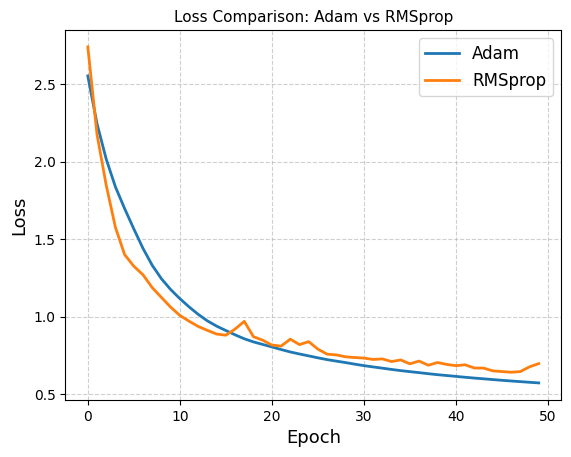

In [51]:
def compare_optimizers(X_train, Y_train, hidden_size=128):
    """
    Compare the Adam and RMSprop optimizers.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """

    _, loss_adam = train_model(X_train, Y_train, hidden_size, optimizer="adam", verbose=False)
    _, loss_rmsprop = train_model(X_train, Y_train, hidden_size, optimizer="rmsprop", verbose=False)

    plt.plot(loss_adam, label='Adam', linewidth=2)

    plt.plot(loss_rmsprop, label='RMSprop', linewidth=2)

    plt.title('Loss Comparison: Adam vs RMSprop', fontsize=11)
    plt.xlabel('Epoch', fontsize=13)
    plt.ylabel('Loss', fontsize=13)
    plt.legend(fontsize=12)

    plt.grid(True, linestyle='--', alpha=0.6)

    plt.show()


compare_optimizers(x_train,y_train)

## Stochastic Gradient Descent (SGD)

### Impact of Different Learning Rates on SGD


Explore the impact of different learning rates on the training dynamics and performance of Stochastic Gradient Descent (SGD). This will allow us to observe how the learning rate affects convergence speed, stability, and final performance.

Steps for Implementing the Experiment

1. Define the SGD Optimizer: Implement a simple SGD optimizer.
2. Modify the Training Loop: Allow for different learning rates.
3. Train the Model: Run the training process with a set of predefined learning rates.
4. Visualize the Results: Plot the loss curves for each learning rate to compare their effects

1. Implement SGD Optimizer


In [52]:
def update_parameters_with_sgd(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using Stochastic Gradient Descent (SGD).

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    for param in parameters:
        parameters[param] -= learning_rate * gradients[param]
        
    return parameters

2. Modify the Training Loop


In [53]:
def train_model_with_sgd(X_train, Y_train, hidden_size, epochs=50, learning_rate=0.01, verbose=True):
    """
    Train the neural network model using SGD optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = Y_train.shape[1]
    batch_size = X_train.shape[0] // 20

    parameters = initialize_parameters(input_size, hidden_size, output_size)
    
    if verbose:
        print(f"\nTraining with hidden layer size: {hidden_size} using SGD optimizer")
        print("_" * 50)

    loss_history = []

    for epoch in range(epochs):
        shuffled_indices = np.random.permutation(X_train.shape[0])
        X_train_shuffled = X_train[shuffled_indices]
        Y_train_shuffled = Y_train[shuffled_indices]

        X_batch = X_train_shuffled[:batch_size].T
        Y_batch = Y_train_shuffled[:batch_size].T

        y_pred, cache = forward_propagation(X_batch, parameters)

        epoch_loss = compute_loss(Y_batch, y_pred)
        loss_history.append(epoch_loss)

        gradients = backward_propagation(X_batch, Y_batch, parameters, cache)

        parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)

        if verbose and epoch % 5 == 0:
            print(f"Epoch {epoch}, Loss: {epoch_loss:.4f}")

    return parameters, loss_history

3. Experiment with Different Learning Rates



Training with learning rate: 0.001

Training with hidden layer size: 128 using SGD optimizer
__________________________________________________
Epoch 0, Loss: 2.7598
Epoch 5, Loss: 2.7219
Epoch 10, Loss: 2.6907
Epoch 15, Loss: 2.6422
Epoch 20, Loss: 2.6130
Epoch 25, Loss: 2.5825
Epoch 30, Loss: 2.5655
Epoch 35, Loss: 2.5381
Epoch 40, Loss: 2.4890
Epoch 45, Loss: 2.5088

Training with learning rate: 0.01

Training with hidden layer size: 128 using SGD optimizer
__________________________________________________
Epoch 0, Loss: 2.9490
Epoch 5, Loss: 2.4002
Epoch 10, Loss: 2.2128
Epoch 15, Loss: 2.0788
Epoch 20, Loss: 1.9557
Epoch 25, Loss: 1.8714
Epoch 30, Loss: 1.7791
Epoch 35, Loss: 1.7231
Epoch 40, Loss: 1.6584
Epoch 45, Loss: 1.6098

Training with learning rate: 0.1

Training with hidden layer size: 128 using SGD optimizer
__________________________________________________
Epoch 0, Loss: 2.6427
Epoch 5, Loss: 1.6056
Epoch 10, Loss: 1.2820
Epoch 15, Loss: 1.1137
Epoch 20, Loss: 1.1034

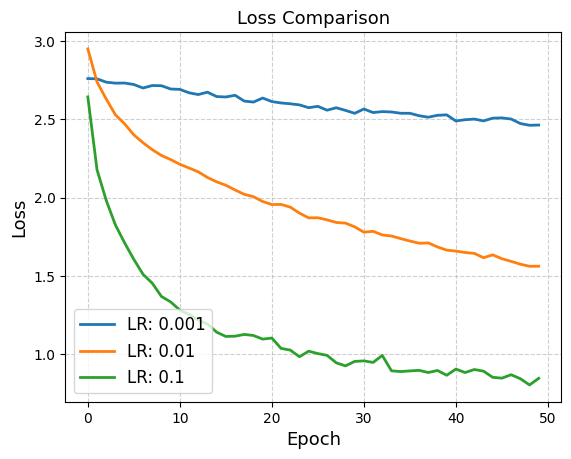

In [55]:
def compare_learning_rates(X_train, Y_train, hidden_size, epochs=50, learning_rates=[0.001, 0.01, 0.1]):
    """
    Compare the performance of SGD with different learning rates.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rates: List of learning rates to test.
    """
    all_loss_histories = {}  # Dictionary to store loss history for each learning rate

    for lr in learning_rates:
        print(f"\nTraining with learning rate: {lr}")
        # Use the train_model_with_sgd function for training
        _, loss_history = train_model_with_sgd(X_train, Y_train, hidden_size, epochs, lr)
        
        # Store loss history for this learning rate
        all_loss_histories[lr] = loss_history

    for lr, losses in all_loss_histories.items():
        plt.plot(losses, label=f'LR: {lr}', linewidth=2)

    plt.title('Loss Comparison', fontsize=13)
    plt.xlabel('Epoch', fontsize=13)
    plt.ylabel('Loss', fontsize=13)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


compare_learning_rates(x_train,y_train, 128)

### SGD with Momentum vs. Classic SGD


TODO: Compare Stochastic Gradient Descent (SGD) with momentum and classic SGD, you can set up an experiment that trains the same model using both methods. This will help you observe differences in convergence speed and stability.

Steps for Implementing the Comparison:

1. Implement Classic SGD: Ensure you have a basic SGD implementation.(already implemented in the previous cells)

2. Implement SGD with Momentum: Add a momentum version of the SGD optimizer.

3. Modify the Training Loop: Allow for both optimizers in the training process.

4. Train the Model: Run the training process using both optimizers.

5. Visualize the Results: Plot the loss curves for each optimizer to compare their performance.

2. Implement SGD with Momentum


In [56]:
def initialize_momentum(parameters):
    """
    Initialize the momentum variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: Momentum variable (initialized to zeros).
    """
    v = {param: np.zeros_like(parameters[param]) for param in parameters}    
    return v

def update_parameters_with_momentum(parameters, gradients, v, learning_rate=0.01, beta=0.9):
    """
    Update parameters using SGD with momentum.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: Momentum variable.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for momentum.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated momentum variable.
    """
    for param in parameters:
        v[param] = beta * v[param] + (1 - beta) * gradients[param]
        parameters[param] -= learning_rate * v[param]
        
    return parameters, v

3. Modify the Training Loop


In [59]:
def train_model(X_train, Y_train, hidden_size, epochs=50, learning_rate=0.01, optimizer='sgd'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('sgd' or 'momentum').

    Returns:
    - loss_history: List of loss values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = Y_train.shape[1]
    batch_size = X_train.shape[0] // 60
    

    parameters = initialize_parameters(input_size, hidden_size, output_size)
    v = initialize_momentum(parameters) if optimizer == 'momentum' else None

    print(f"\nTraining with hidden layer size: {hidden_size} using {optimizer.upper()} optimizer")
    print("-" * 50)
    loss_history = []

    for epoch in range(epochs):
        shuffled_indices = np.random.permutation(X_train.shape[0])
        X_train_shuffled = X_train[shuffled_indices]
        Y_train_shuffled = Y_train[shuffled_indices]

        X_batch = X_train_shuffled[:batch_size].T
        Y_batch = Y_train_shuffled[:batch_size].T

        y_pred, cache = forward_propagation(X_batch, parameters)

        epoch_loss = compute_loss(Y_batch, y_pred)
        loss_history.append(epoch_loss)

        gradients = backward_propagation(X_batch, Y_batch, parameters, cache)

        if optimizer == 'sgd':
            parameters = update_parameters_with_sgd(parameters, gradients)
        elif optimizer == 'momentum':
            parameters, v = update_parameters_with_momentum(parameters, gradients, v)
        else:
            raise ValueError("Optimizer must be either 'sgd' or 'momentum'.")

        if epoch % 5 == 0:
            print(f"Epoch {epoch}, Loss: {epoch_loss:.4f}")
    print("-" * 50)

    return parameters, loss_history

4. Train the Model with Both Optimizers



Training with Optimizer: sgd

Training with hidden layer size: 128 using SGD optimizer
--------------------------------------------------
Epoch 0, Loss: 2.6893
Epoch 5, Loss: 2.2587
Epoch 10, Loss: 2.1017
Epoch 15, Loss: 2.0189
Epoch 20, Loss: 1.9089
Epoch 25, Loss: 1.8340
Epoch 30, Loss: 1.7684
Epoch 35, Loss: 1.7242
Epoch 40, Loss: 1.6527
Epoch 45, Loss: 1.5928
--------------------------------------------------

Training with Optimizer: momentum

Training with hidden layer size: 128 using SGD optimizer
--------------------------------------------------
Epoch 0, Loss: 2.6388
Epoch 5, Loss: 2.3968
Epoch 10, Loss: 2.2790
Epoch 15, Loss: 2.1824
Epoch 20, Loss: 2.1148
Epoch 25, Loss: 1.9783
Epoch 30, Loss: 1.9249
Epoch 35, Loss: 1.8673
Epoch 40, Loss: 1.8256
Epoch 45, Loss: 1.7163
--------------------------------------------------


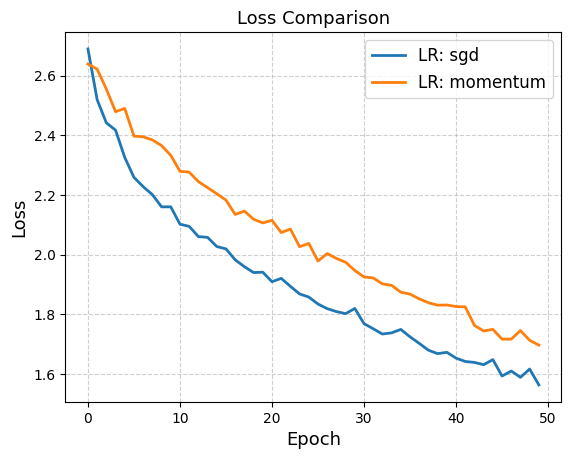

In [60]:
def compare_sgd_and_momentum(X_train, Y_train, hidden_size, epochs=50):
    """
    Compare the performance of classic SGD and SGD with momentum.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """
    all_loss_histories = {}  # Dictionary to store loss history for each learning rate

    for opt in ["sgd", "momentum"]:
        print(f"\nTraining with Optimizer: {opt}")
        # Use the train_model_with_sgd function for training
        _, loss_history = train_model(X_train, Y_train, hidden_size, epochs, opt)
        
        # Store loss history for this learning rate
        all_loss_histories[opt] = loss_history

    for opt, losses in all_loss_histories.items():
        plt.plot(losses, label=f'LR: {opt}', linewidth=2)

    plt.title('Loss Comparison', fontsize=13)
    plt.xlabel('Epoch', fontsize=13)
    plt.ylabel('Loss', fontsize=13)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


compare_sgd_and_momentum(x_train,y_train, 128)

## Mini-Batch Gradient Descent

### Mini-Batch Size Optimization

TODO: Investigate how different mini-batch sizes affect model performance, you can set up an experiment where you train the same model using various mini-batch sizes.

Steps for Implementing the Mini-Batch Size Experiment

1. Modify the Training Loop: Update the training loop to use mini-batches.
2. Train the Model: Run the training process with a set of predefined mini-batch sizes.
3. Evaluate Performance: Track training time and accuracy for each mini-batch size.
4. Print the training losses and accuracies for comparison.

1. Modify the Training Loop for Mini-Batches


In [61]:
def train_model_with_mini_batches(X_train, Y_train, hidden_size, epochs=50, learning_rate=0.01, batch_size=32):
    """
    Train the neural network model using mini-batches.

    Parameters:
    - X_train: Training data.
    - Y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - batch_size: Size of mini-batches.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = Y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)

    print(f"\nTraining with hidden layer size: {hidden_size} using mini-batches and batch size of {batch_size}")
    print("-" * 50)
    loss_history = []
    accuracy_history = []

    for epoch in range(epochs):
        shuffled_indices = np.random.permutation(X_train.shape[0])
        X_train_shuffled = X_train[shuffled_indices]
        Y_train_shuffled = Y_train[shuffled_indices]

        epoch_loss = 0
        correct_predictions = 0
        total_samples = 0

        for start_idx in range(0, X_train.shape[0], batch_size):
            end_idx = min(start_idx + batch_size, X_train.shape[0])
            X_batch = X_train_shuffled[start_idx:end_idx].T
            Y_batch = Y_train_shuffled[start_idx:end_idx].T

            y_pred, cache = forward_propagation(X_batch, parameters)

            batch_loss = compute_loss(Y_batch, y_pred)
            epoch_loss += batch_loss * (end_idx - start_idx)

            gradients = backward_propagation(X_batch, Y_batch, parameters, cache)

            parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)

            batch_predictions = np.argmax(y_pred, axis=0)
            batch_labels = np.argmax(Y_batch, axis=0)
            correct_predictions += np.sum(batch_predictions == batch_labels)
            total_samples += end_idx - start_idx

        epoch_loss /= X_train.shape[0]
        loss_history.append(epoch_loss)

        epoch_accuracy = correct_predictions / total_samples
        accuracy_history.append(epoch_accuracy)

        if epoch % 5 == 0:
            print(f"Epoch {epoch}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")
    print("-" * 50)
    return parameters, loss_history, accuracy_history


2. Train the Model with Different Mini-Batch Sizes


In [62]:
def compare_mini_batch_sizes(X_train, Y_train, hidden_size, epochs=50, batch_sizes=[16, 32, 64]):
    """
    Compare the performance of different mini-batch sizes and print results.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_sizes: List of mini-batch sizes to test.
    """
    for batch_size in batch_sizes:
        parameters, loss_history, accuracy_history = train_model_with_mini_batches(
            X_train, Y_train, hidden_size, epochs, learning_rate=0.01, batch_size=batch_size
        )

compare_mini_batch_sizes(x_train,y_train, 128)


Training with hidden layer size: 128 using mini-batches and batch size of 16
--------------------------------------------------
Epoch 0, Loss: 0.6514, Accuracy: 0.7802
Epoch 5, Loss: 0.3813, Accuracy: 0.8671
Epoch 10, Loss: 0.3325, Accuracy: 0.8821
Epoch 15, Loss: 0.3022, Accuracy: 0.8911
Epoch 20, Loss: 0.2791, Accuracy: 0.9001
Epoch 25, Loss: 0.2608, Accuracy: 0.9069
Epoch 30, Loss: 0.2459, Accuracy: 0.9124
Epoch 35, Loss: 0.2318, Accuracy: 0.9172
Epoch 40, Loss: 0.2192, Accuracy: 0.9219
Epoch 45, Loss: 0.2084, Accuracy: 0.9250
--------------------------------------------------

Training with hidden layer size: 128 using mini-batches and batch size of 32
--------------------------------------------------
Epoch 0, Loss: 0.7501, Accuracy: 0.7503
Epoch 5, Loss: 0.4170, Accuracy: 0.8549
Epoch 10, Loss: 0.3715, Accuracy: 0.8701
Epoch 15, Loss: 0.3437, Accuracy: 0.8788
Epoch 20, Loss: 0.3229, Accuracy: 0.8857
Epoch 25, Loss: 0.3060, Accuracy: 0.8914
Epoch 30, Loss: 0.2909, Accuracy: 0.896

### Mini-Batch vs. Full-Batch Gradient Descent


TODO: Compare the efficiency and performance of mini-batch gradient descent against full-batch gradient descent.

1. Implement Full-Batch Gradient Descent: Ensure you have a full-batch gradient descent implementation.

2. Modify the Training Loop: Allow the training loop to handle both mini-batch and full-batch scenarios.

3. Train the Model: Run the training process using both methods and track their performance.

4. Print Results: Display the final loss and accuracy for both methods along with training times.

In [63]:
def train_model_full_batch(X_train, Y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    input_size = X_train.shape[1]
    output_size = Y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)

    print(f"\nTraining with hidden layer size: {hidden_size} using full-batch gradient descent")
    print("-" * 50)
    loss_history = []
    accuracy_history = []

    X_train_trans = X_train.T
    Y_train_trans = Y_train.T

    for epoch in range(epochs):
        y_pred, cache = forward_propagation(X_train_trans, parameters)

        epoch_loss = compute_loss(Y_train_trans, y_pred)
        loss_history.append(epoch_loss)

        gradients = backward_propagation(X_train_trans, Y_train_trans, parameters, cache)

        parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)

        predictions = np.argmax(y_pred, axis=0)
        labels = np.argmax(Y_train_trans, axis=0)
        epoch_accuracy = np.sum(predictions == labels) / X_train.shape[0]
        accuracy_history.append(epoch_accuracy)

        if epoch % 5 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")
    print("-" * 50)
    return parameters, loss_history, accuracy_history

In [64]:
def compare_mini_batch_and_full_batch(X_train, Y_train, hidden_size, epochs=50, batch_size=32):
    """
    Compare the performance of mini-batch gradient descent against full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_size: Size of mini-batches for mini-batch gradient descent.
    """
    start_time = time.time()
    parameters_mb, loss_history_mb, accuracy_history_mb = train_model_with_mini_batches(
        X_train, Y_train, hidden_size, epochs, learning_rate=0.01, batch_size=batch_size
    )
    end_time = time.time()
    time_mb = end_time - start_time

    start_time = time.time()
    parameters_fb, loss_history_fb, accuracy_history_fb = train_model_full_batch(
        X_train, Y_train, hidden_size, epochs, learning_rate=0.01
    )
    end_time = time.time()
    time_fb = end_time - start_time

    
    final_loss_mb = loss_history_mb[-1]
    final_accuracy_mb = accuracy_history_mb[-1]
    print(f"\nMini-Batch Final Loss: {final_loss_mb:.4f}, Final Accuracy: {final_accuracy_mb:.4f}, Time: {time_mb:.2f} seconds")
    
    final_loss_fb = loss_history_fb[-1]
    final_accuracy_fb = accuracy_history_fb[-1]
    print(f"\nFull-Batch Final Loss: {final_loss_fb:.4f}, Final Accuracy: {final_accuracy_fb:.4f}, Time: {time_fb:.2f} seconds")


compare_mini_batch_and_full_batch(x_train,y_train, 128)


Training with hidden layer size: 128 using mini-batches and batch size of 32
--------------------------------------------------
Epoch 0, Loss: 0.7590, Accuracy: 0.7465
Epoch 5, Loss: 0.4217, Accuracy: 0.8532
Epoch 10, Loss: 0.3764, Accuracy: 0.8684
Epoch 15, Loss: 0.3486, Accuracy: 0.8782
Epoch 20, Loss: 0.3267, Accuracy: 0.8856
Epoch 25, Loss: 0.3100, Accuracy: 0.8907
Epoch 30, Loss: 0.2953, Accuracy: 0.8952
Epoch 35, Loss: 0.2825, Accuracy: 0.9001
Epoch 40, Loss: 0.2714, Accuracy: 0.9026
Epoch 45, Loss: 0.2609, Accuracy: 0.9071
--------------------------------------------------

Training with hidden layer size: 128 using full-batch gradient descent
--------------------------------------------------
Epoch 0, Loss: 2.7228, Accuracy: 0.1053
Epoch 5, Loss: 2.3097, Accuracy: 0.1372
Epoch 10, Loss: 2.1638, Accuracy: 0.1830
Epoch 15, Loss: 2.0599, Accuracy: 0.2486
Epoch 20, Loss: 1.9732, Accuracy: 0.3104
Epoch 25, Loss: 1.8963, Accuracy: 0.3740
Epoch 30, Loss: 1.8266, Accuracy: 0.4275
Epoc